In [147]:
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import *
from common.gradient import numerical_gradient

import matplotlib.pyplot as plt

In [ ]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [149]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

In [150]:
iters_num = 10000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 600  # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [151]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
ilist = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
iter_per_epoch

100.0

In [152]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)  # 다음 장에서 구현할 더 빠른 방법!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_batch, t_batch)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.09166666666666666, 0.1009
train acc, test acc | 0.13833333333333334, 0.1456
train acc, test acc | 0.355, 0.3738
train acc, test acc | 0.4683333333333333, 0.513
train acc, test acc | 0.6583333333333333, 0.6573
train acc, test acc | 0.7633333333333333, 0.7472
train acc, test acc | 0.7733333333333333, 0.7871
train acc, test acc | 0.795, 0.8178
train acc, test acc | 0.8466666666666667, 0.836
train acc, test acc | 0.8166666666666667, 0.8526
train acc, test acc | 0.8466666666666667, 0.8637
train acc, test acc | 0.8566666666666667, 0.8721
train acc, test acc | 0.8716666666666667, 0.8768
train acc, test acc | 0.8783333333333333, 0.8842
train acc, test acc | 0.8916666666666667, 0.8882
train acc, test acc | 0.915, 0.8923
train acc, test acc | 0.905, 0.8952
train acc, test acc | 0.8916666666666667, 0.8983
train acc, test acc | 0.8783333333333333, 0.9001
train acc, test acc | 0.915, 0.9024
train acc, test acc | 0.91, 0.905
train acc, test acc | 0.8866666666666667, 0.9063
tr

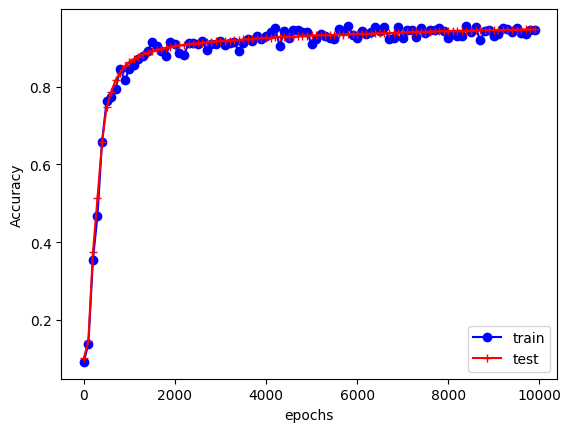

In [154]:
plt.plot(list(range(0,10000,100)), train_acc_list, marker='o', linestyle='-', color='blue', label='train')
plt.plot(list(range(0,10000,100)), test_acc_list, marker='+', linestyle='-', color='red', label='test')
plt.legend(loc='lower right')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

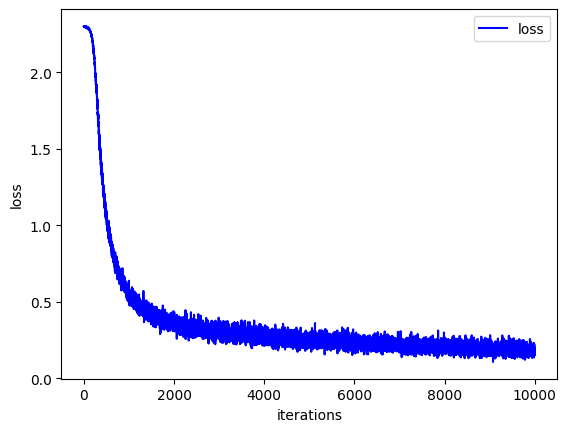

In [ ]:

plt.plot(list(range(iters_num)), train_loss_list, linestyle='-', color='blue', label='loss')
plt.legend(loc='upper right')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()